<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3 Homework**

We generate a 2-class dataset for a suitable classification.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic data based on the ideal logistic model
np.random.seed(42)

# Define coefficients for the logistic model
beta_0 = -1  # Intercept
beta_1 = 2   # Slope

# Generate the feature values (X)
X = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Calculate probabilities using the logistic function
logit = beta_0 + beta_1 * X.flatten()
probabilities = 1 / (1 + np.exp(-logit))

# Sample 0-1 values based on the probabilities
y = np.random.binomial(1, probabilities)

Now we divide the dataset into three parts: train, validation, and test.

In [76]:
from sklearn.model_selection import train_test_split

# Split into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

We train the Logistic Regression model on the training set. We plot it for a better visualization.

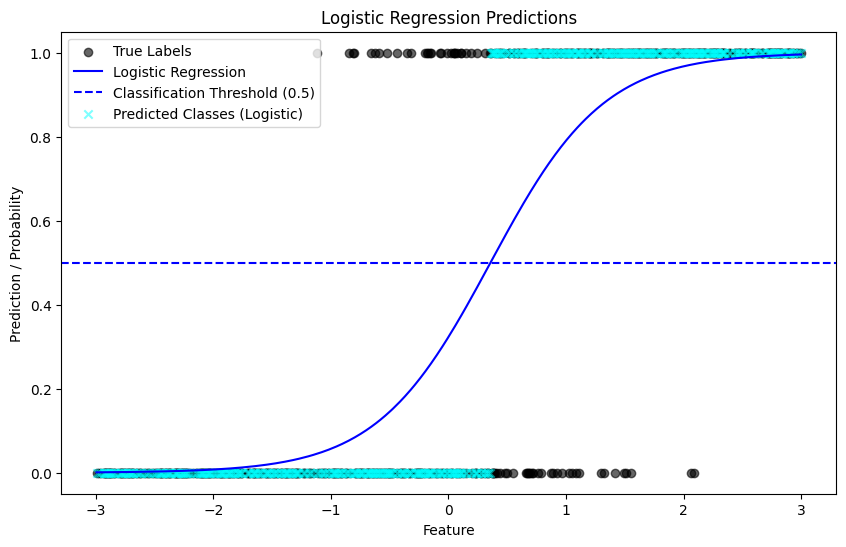

In [78]:
from sklearn.linear_model import LogisticRegression

# Fit Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict_proba(X_train)[:, 1]  # Probabilities for class 1
predicted_classes_logistic = logistic_model.predict(X_train)  # Predicted classes (0 or 1)

# We sort values before ploting
sorted_indices = np.argsort(X_train.flatten())
X_train_sorted = X_train[sorted_indices]
logistic_preds_sorted = logistic_preds[sorted_indices]

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='black', label='True Labels', alpha=0.6)
plt.plot(X_train_sorted, logistic_preds_sorted, color='blue', label='Logistic Regression')  # Ahora la línea será suave

# Add classification threshold information
threshold = 0.5  # Default threshold for logistic regression
plt.axhline(threshold, color='blue', linestyle='--', label='Classification Threshold (0.5)')
plt.scatter(X_train, predicted_classes_logistic, color='cyan', label='Predicted Classes (Logistic)', alpha=0.5, marker='x')

plt.title("Logistic Regression Predictions")
plt.xlabel("Feature")
plt.ylabel("Prediction / Probability")
plt.legend()
plt.show()

We use the validation set to:

- Plot the ROC curve.
- Calculate the AUC.
- Determine the optimal threshold using the ROC curve for my dataset

###**Question 1: Would a different threshold yield better results? How does shifting the threshold affect the trade-off between sensitivity and specificity?**

Yes, the standard threshold of 0.5 is not always the best choice. The optimal threshold depends on different facts such as the problem context, the desired trade-off between false positives and false negatives and the metric to be optimized (Accuracy, F1-Score, Sensitivity, Specificity, etc.).

Lets see how the Accuracy, F1-Score, Sensitivity and Specificity changes with different values for the threshold.


In [79]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

ths = [0.2, 0.3, 0.5, 0.7, 0.8]

for th in ths:

    # Apply the selected threshold to the test set
    y_test_probs = logistic_model.predict_proba(X_test)[:, 1]  # Get probability predictions
    y_test_pred = (y_test_probs >= th).astype(int)  # Apply the chosen threshold

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Compute specificity (True Negative Rate)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)  # True Negative Rate
    sensitivity = recall  # Sensitivity is the same as Recall

    # Print results
    print(f"threshold = {th} \n", f"accuracy = {accuracy}", f"precision = {precision}", f"sensivity = {recall}", f"F1-Score = {f1}", f"specificity = {specificity}\n")

threshold = 0.2 
 accuracy = 0.865 precision = 0.7647058823529411 sensivity = 0.9629629629629629 F1-Score = 0.8524590163934426 specificity = 0.7983193277310925

threshold = 0.3 
 accuracy = 0.895 precision = 0.8191489361702128 sensivity = 0.9506172839506173 F1-Score = 0.88 specificity = 0.8571428571428571

threshold = 0.5 
 accuracy = 0.88 precision = 0.8701298701298701 sensivity = 0.8271604938271605 F1-Score = 0.8481012658227848 specificity = 0.9159663865546218

threshold = 0.7 
 accuracy = 0.85 precision = 0.8923076923076924 sensivity = 0.7160493827160493 F1-Score = 0.7945205479452054 specificity = 0.9411764705882353

threshold = 0.8 
 accuracy = 0.805 precision = 0.8888888888888888 sensivity = 0.5925925925925926 F1-Score = 0.7111111111111111 specificity = 0.9495798319327731



In this example me can see that:

- Lower threshold → Higher sensitivity, which means more positives detected, but also more false positives, reducing specificity.

- Higher threshold → Higher specificity, which means fewer false positives, but also more false negatives, reducing sensitivity.

###**Question 2: How do you define "better" results? Is higher specificity more valuable than higher sensitivity in certain contexts? Or maybe the other way around? Does the best threshold depend on the task? (discuss cases like disease detection vs. spam filtering)**

Better results depend on the specific goal of the classification task. The context plays a very important roll in the election of the threshold.

One good example to show this is **Disease Detection vs Spam Filtering.**

- In disease detection, a lower threshold leads to more cases detected, which reduces false negatives. Higher threshold leads to fewer cases detected, which increases false negatives (not ideal for medical applications).

- In spam filtering, a lower threshold means more emails classified as spam (but more false positives), while a higher threshold means that most certain spam emails are marked (higher precision, but some spam may be missed).

If minimizing false negatives is the priority, then looking for a higher sensitivity is a better approach. In medical diagnosis, missing a real case (false negative) is worse than a false alarm, so it is an example of this case.Here we prefer a lower threshold.

If minimizing false positives is the priority, then a higher specificity is better. In fraud detection, wrongly flagging someone as fraudulent (false positive) can be costly, so a higher specificity is preferred. Here we prefer a higher threshold.

So, in conclusion, the importance of Sensitivity vs. Specificity does depend on the specific task.

### **Question 3: How does a ROC curve help in this process? Learn how to use a ROC curve to visualize the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity)**

The Receiver Operating Characteristic (ROC) curve is a graphical tool that helps visualize the trade-off between Sensitivity (True Positive Rate) and Specificity (False Positive Rate) at different classification thresholds.

- X-axis (False Positive Rate - FPR): The proportion of negative cases incorrectly classified as positive.
- Y-axis (True Positive Rate - TPR): The proportion of actual positive cases correctly classified.

Each point on the ROC curve represents a different threshold. Moving along the curve:
- Lower threshold (left side) → More positives detected (higher Sensitivity), but more false positives.
- Higher threshold (right side) → Fewer false positives (higher Specificity), but more false negatives.

The ROC curve is useful because it shows the trade-off between detecting more positives and making fewer mistakes. It helps to compare models: The closer the curve is to the top-left corner, the better the model. It also allows threshold selection: We can choose an optimal threshold based on needs.

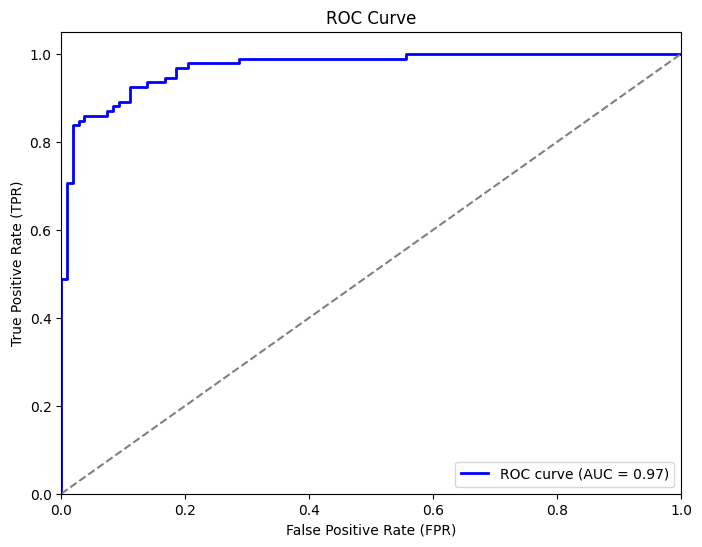

In [80]:
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the validation set
y_val_probs = logistic_model.predict_proba(X_val)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

###**Question 4: How do you select the optimal threshold using the ROC curve? Discuss strategies to select a threshold depending on the specific task at hand and the acceptable trade-off between sensitivity and specificity.**

**1.** To find a threshold for a specific task that requires a high sensivity, we generate the ROC curve. Then, we find the threshold where Sensitivity ≥ required level. Select the smallest threshold that meets the sensitivity requirement. This ensures that the model detects as many positive cases as possible, even at the cost of increasing false positives.

Lets see it in our example:


In [81]:
# Define the desired sensitivity level
desired_sensitivity = 0.7  # Example: Require at least 95% sensitivity

# Find the threshold that meets or exceeds the sensitivity requirement
optimal_idx_sensitivity = np.argmax(tpr >= desired_sensitivity)
optimal_threshold_sensitivity = thresholds[optimal_idx_sensitivity]
print(f"Optimal Threshold for Sensitivity {desired_sensitivity*100:.1f}%: {optimal_threshold_sensitivity:.3f}")


Optimal Threshold for Sensitivity 70.0%: 0.839


**2.** To find a threshold for a specific task that requires a high specificity, we plot the ROC curve and then find the threshold where Specificity ≥ required level. Since Specificity = 1 - False Positive Rate (FPR), we identify the smallest threshold where 1 - FPR ≥ required specificity. This ensures that the model minimizes false positives while maintaining a sufficient level of true positive detection.

Lets see it in our example:


In [82]:
# Define the desired specificity level
desired_specificity = 0.7  # Example: Require at least 95% specificity

# Find all indices where specificity is at least the desired level
valid_indices = np.where((1 - fpr) >= desired_specificity)[0]

if len(valid_indices) > 0:
    optimal_idx_specificity = valid_indices[-1]
    optimal_threshold_specificity = thresholds[optimal_idx_specificity]
    print(f"Optimal Threshold for Specificity {desired_specificity*100:.1f}%: {optimal_threshold_specificity:.3f}")

Optimal Threshold for Specificity 70.0%: 0.137


**3.** To achieve an acceptable trade-off between sensivity and specificity, we will consider the top-left corner of the ROC curve (0,1), which represents:
- False Positive Rate (FPR) = 0 → No false alarms
- True Positive Rate (TPR) = 1 → All positives detected
To find the optimal threshold, we compute the Euclidean distance from each point (FPR, TPR) to (0,1):
$$
\text{distance} = \sqrt{(\text{FPR})^2 + (1 - \text{TPR})^2}
$$
Then, we choose the threshold that minimizes this distance.
Lets see it in our example.


In [84]:
# Compute the distance from the top-left corner (0,1) for each threshold
distances = np.sqrt(fpr**2 + (1 - tpr)**2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.3f}")

Optimal Threshold: 0.408


Lets plot the different obtained thresholds in the ROC curve:

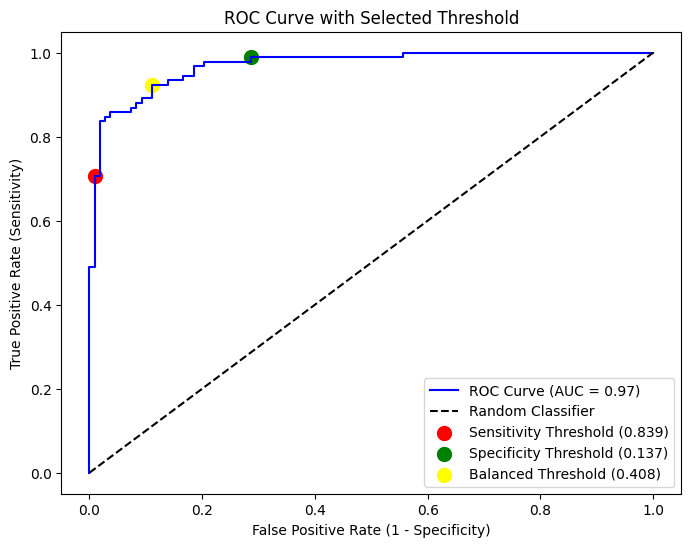

In [85]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Mark the selected threshold point on the ROC curve
plt.scatter(fpr[optimal_idx_sensitivity], tpr[optimal_idx_sensitivity],
            color='red', marker='o', s=100, label=f'Sensitivity Threshold ({optimal_threshold_sensitivity:.3f})')
plt.scatter(fpr[optimal_idx_specificity], tpr[optimal_idx_specificity],
            color='green', marker='o', s=100, label=f'Specificity Threshold ({optimal_threshold_specificity:.3f})')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx],
            color='yellow', marker='o', s=100, label=f'Balanced Threshold ({optimal_threshold:.3f})')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve with Selected Threshold')
plt.legend()
plt.show()


### **Question 5: What is the AUC metric and how is it useful? Define AUC (Area Under the Curve) and discuss its role in evaluating the overall performance of a classifier.**
AUC (Area Under the Curve) measures the area under the ROC curve, which plots the True Positive Rate (Sensitivity) vs. False Positive Rate (1 - Specificity). Mathematically, AUC is the probability that the classifier ranks a randomly chosen positive instance higher than a randomly chosen negative instance.
$$
AUC = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d\text{FPR}
$$
A higher AUC means better model performance.

AUC is useful because it measures the model's ability to distinguish classes
The higher the AUC, the better classification performance.

In [86]:
# Compute the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9698067632850241


Now, we will apply the selected threshold to the test set to evaluate final model performance using the following metrics:
- Accuracy
- Precision & Recall
- F1-Score
- Specificity & Sensitivity

In [47]:
# Apply the selected threshold to the test set
y_test_probs = logistic_model.predict_proba(X_test)[:, 1]  # Get probability predictions
y_test_pred = (y_test_probs >= optimal_threshold).astype(int)  # Apply the chosen threshold

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Compute specificity (True Negative Rate)
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # True Negative Rate
sensitivity = recall  # Sensitivity is the same as Recall

# Print results
print(f"threshold = {optimal_threshold} \n", f"accuracy = {accuracy}", f"precision = {precision}", f"sensivity = {recall}", f"F1-Score = {f1}", f"specificity = {specificity}\n")

threshold = 0.4077992411350898 
 accuracy = 0.91 precision = 0.8795180722891566 sensivity = 0.9012345679012346 F1-Score = 0.8902439024390244 specificity = 0.9159663865546218

